# 任务一：模型构构建基本流程
【任务目标】
- 理解什么是交叉验证
- 掌握如何进行模型训练
- 掌握如何进行模型评估
- 掌握如何使用模型对新数据进行预测
- 预测模型参数理解

## 1、加载处理好的训练数据

In [5]:
import pandas as pd
TrainData = pd.read_csv("data/train_processed.csv")
TrainData.head()

,Survived,AgeIsMissing,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,"SexAgeCombo_female_(0, 18]","SexAgeCombo_female_(18, 25]","SexAgeCombo_female_(25, 40]","SexAgeCombo_female_(40, 60]","SexAgeCombo_female_(60, 100]","SexAgeCombo_male_(0, 18]","SexAgeCombo_male_(18, 25]","SexAgeCombo_male_(25, 40]","SexAgeCombo_male_(40, 60]","SexAgeCombo_male_(60, 100]"
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
TrainData.isnull()

,Survived,AgeIsMissing,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,...,"SexAgeCombo_female_(0, 18]","SexAgeCombo_female_(18, 25]","SexAgeCombo_female_(25, 40]","SexAgeCombo_female_(40, 60]","SexAgeCombo_female_(60, 100]","SexAgeCombo_male_(0, 18]","SexAgeCombo_male_(18, 25]","SexAgeCombo_male_(25, 40]","SexAgeCombo_male_(40, 60]","SexAgeCombo_male_(60, 100]"
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
TrainData.head().T

,0,1,2,3,4
Survived,0,1,1,1,0
AgeIsMissing,0,0,0,0,0
IsAlone,0,0,1,0,1
IsMother,0,0,0,0,0
Pclass_1,0,1,0,1,0
Pclass_2,0,0,0,0,0
Pclass_3,1,0,1,0,1
Sex_female,0,1,1,1,0
Sex_male,1,0,0,0,1
Embarked_C,0,1,0,0,0


In [8]:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Survived                      891 non-null    int64
 1   AgeIsMissing                  891 non-null    int64
 2   IsAlone                       891 non-null    int64
 3   IsMother                      891 non-null    int64
 4   Pclass_1                      891 non-null    int64
 5   Pclass_2                      891 non-null    int64
 6   Pclass_3                      891 non-null    int64
 7   Sex_female                    891 non-null    int64
 8   Sex_male                      891 non-null    int64
 9   Embarked_C                    891 non-null    int64
 10  Embarked_Q                    891 non-null    int64
 11  Embarked_S                    891 non-null    int64
 12  AgeBin_(0, 18]                891 non-null    int64
 13  AgeBin_(18, 25]               891 n

## 2、特征变量与目标变量分离

由于后续使用算法训练模型时，要求将特征变量与目标变量开输入到算法中，因此需要先将特征变量与目标变量从训练数据中拆分出来

In [9]:
# trainData：为所有训练数据集，trainData_X:训练集自变量(x)，trainData_y:训练集因变量(y)
# 拆分出特征变量（自变量）
trainData_X = TrainData.drop(['Survived'], axis = 1)
# 拆分出目标变量（因变量）
trainData_y = TrainData.Survived 

In [10]:
trainData_X

,AgeIsMissing,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,"SexAgeCombo_female_(0, 18]","SexAgeCombo_female_(18, 25]","SexAgeCombo_female_(25, 40]","SexAgeCombo_female_(40, 60]","SexAgeCombo_female_(60, 100]","SexAgeCombo_male_(0, 18]","SexAgeCombo_male_(18, 25]","SexAgeCombo_male_(25, 40]","SexAgeCombo_male_(40, 60]","SexAgeCombo_male_(60, 100]"
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
887,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
888,1,0,1,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
889,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
trainData_y
# Series

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

## 3、数据交叉验证 : 目的是为了防止过拟合

在机器学习里，通常来说我们不能将全部用于数据训练模型，否则我们将没有数据集对该模型进行验证，从而评估我们的模型的预测效果。解决这个问题的一个方法就是数据交叉验证
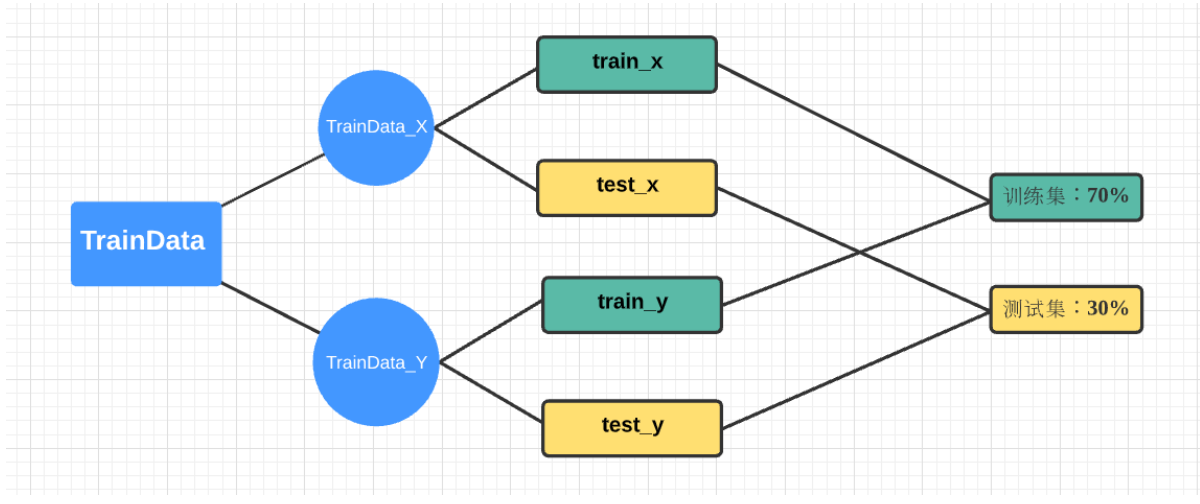

In [12]:
trainData_X.shape

(891, 40)

In [13]:
trainData_y.shape

(891,)

In [14]:
891 * 0.3

267.3

In [15]:
from sklearn.model_selection import train_test_split
# X_test:代表的是测试集数据（自变量），y_test:代表的是测试集数据（因变量）
train_x, test_x, train_y, test_y = train_test_split(
    trainData_X,          # 用来拆分的特征数据集
    trainData_y,          # 用来拆分的目标数据集，注意两个数据集的数量要一致
    test_size=0.3,        # 测试集的占比为30%
    random_state=123456   # 随机种子，保证每次随机抽取的数据一致，以便重现模型结果
)

In [16]:
train_x.shape, test_x.shape

((623, 40), (268, 40))

In [17]:
train_y.shape, test_y.shape

((623,), (268,))

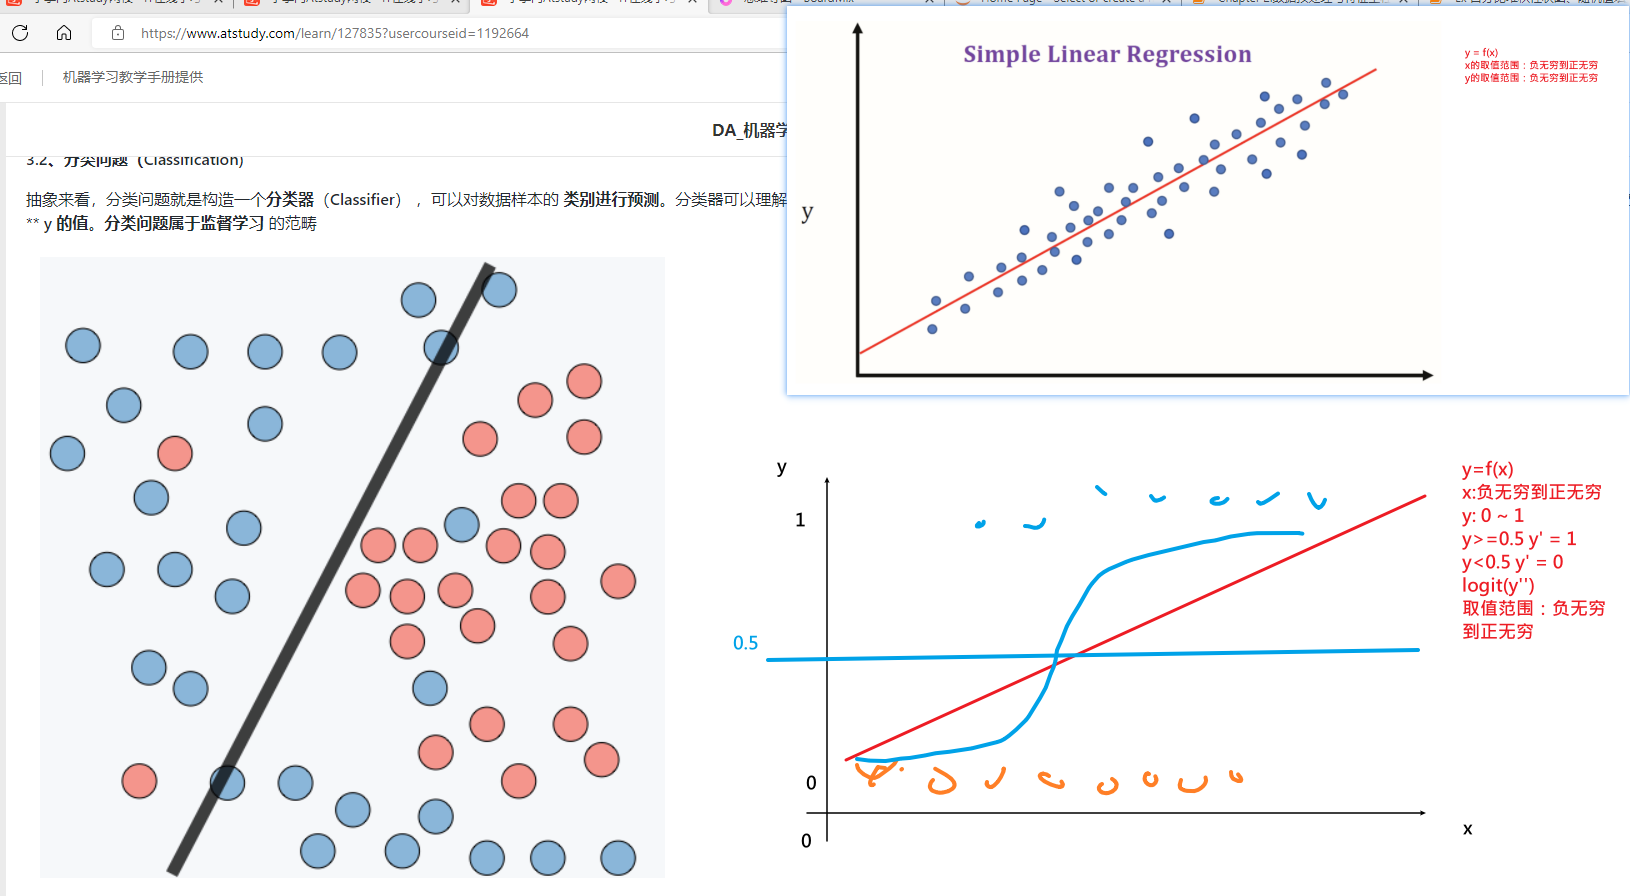

## 4、模型实例化及训练
接下来需要选择一个分类算法进行模型训练，本项目中选择逻辑回归算法

线性回归算法：
$$
y = \beta_0x_0 + \beta_1x_1 + \beta_2x_2 + ... \beta_nx_n + e
$$
x,y取值范围是从负无穷到正无穷，针对数值变量

logistic回归，目标变量是分类变量，最常见的情况是二分类 y = 0 / 1
对y变形  
假设一件事务发生的概率是P,不发生的概率是1-P
$$
logitP = ln(\frac{P} {1-P})
$$
logtiP的取值范围是从负无穷到正无穷，用logitP作为回归方程的因变量，可以得到一个变形的回归方程
$$
logitP = \beta_0x_0 + \beta_1x_1 + \beta_2x_2 + ... \beta_nx_n + e
$$
通过回归方程获取logitP的值，再推出y的值
$$
P >= 0.5  --> y=1
$$
$$
P <0.5 --> y=0
$$

In [18]:
import numpy as np

In [19]:
arrP = np.linspace(0,1,10000)
# arrP是某个事务发生的概率

In [20]:
arrP

array([0.00000000e+00, 1.00010001e-04, 2.00020002e-04, ...,
       9.99799980e-01, 9.99899990e-01, 1.00000000e+00])

In [21]:
arrP_ = 1 - arrP
# 不发生的概率

In [22]:
arrP_

array([1.00000000e+00, 9.99899990e-01, 9.99799980e-01, ...,
       2.00020002e-04, 1.00010001e-04, 0.00000000e+00])

In [23]:
arrLogit = np.log(arrP / arrP_)

C:\Users\hechang\AppData\Local\Temp\ipykernel_26368\3611767588.py:1: RuntimeWarning: divide by zero encountered in divide
  arrLogit = np.log(arrP / arrP_)
C:\Users\hechang\AppData\Local\Temp\ipykernel_26368\3611767588.py:1: RuntimeWarning: divide by zero encountered in log
  arrLogit = np.log(arrP / arrP_)


In [24]:
arrLogit
# inf代表无穷大

array([       -inf, -9.21014035, -8.51689315, ...,  8.51689315,
        9.21014035,         inf])

In [25]:
import matplotlib.pyplot as plt

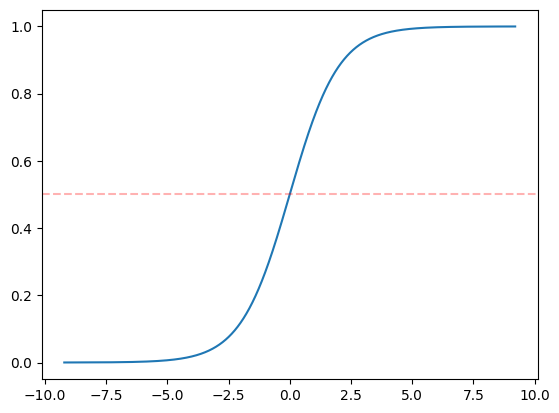

In [26]:
plt.plot(arrLogit, arrP)
plt.axhline(y = 0.5, color = 'red', alpha = 0.3 , ls = '--')

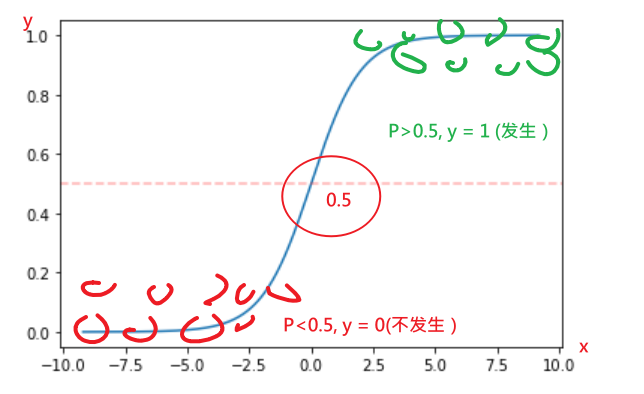

In [27]:
from sklearn.linear_model import LogisticRegression
# 从线性模型模块中引入Logistic回归算法
lr = LogisticRegression()
# 实例化模型
lr.fit(train_x, train_y)
# 在训练集上对模型进行训练

LogisticRegression()

## 5、模型评估 
模型训练出来之后，到底性能如何，这是需要评估的。数据集拆分的目的（拿测试集来评估模型）就是为了让模型评估更加客观，不能既做运动员又做裁判。所以模型评估不能使用训练集，必须在绝对没有参与模型训练的测试集上进行评估。模型评估有很多方法，最常用的指标就是正确率，但是只看一个正确率有时候无法对模型全面评估，所以还会有更多的评估指标，以下为用模型评估方法

- 误分类矩阵
- 准确率，召回率，F1 Score（后续重点介绍）
- ROC曲线，AUC值
- Lorenz曲线
- KS曲线，KS值

In [28]:
from sklearn.metrics import classification_report
# 从模型评估模块中载入 分类评估报告
# 用模型对测试集进行预测（用之前得到的y=f(x)公式，带入x,求解y）
y_test_pred = lr.predict(test_x)
# 利用测试集的x数据，获取测试集上预测的结果
# 输出测试集上模型评估报告classification_report(即预测试的结果集和实际事先标注的真实结果集进行比较)
print(classification_report(test_y,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       166
           1       0.69      0.71      0.70       102

    accuracy                           0.77       268
   macro avg       0.75      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



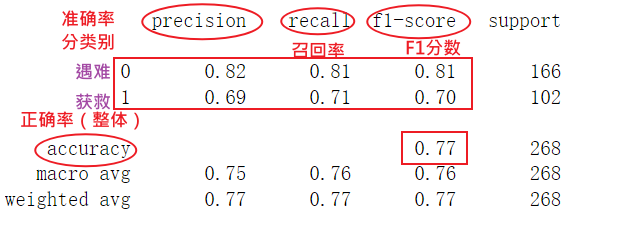

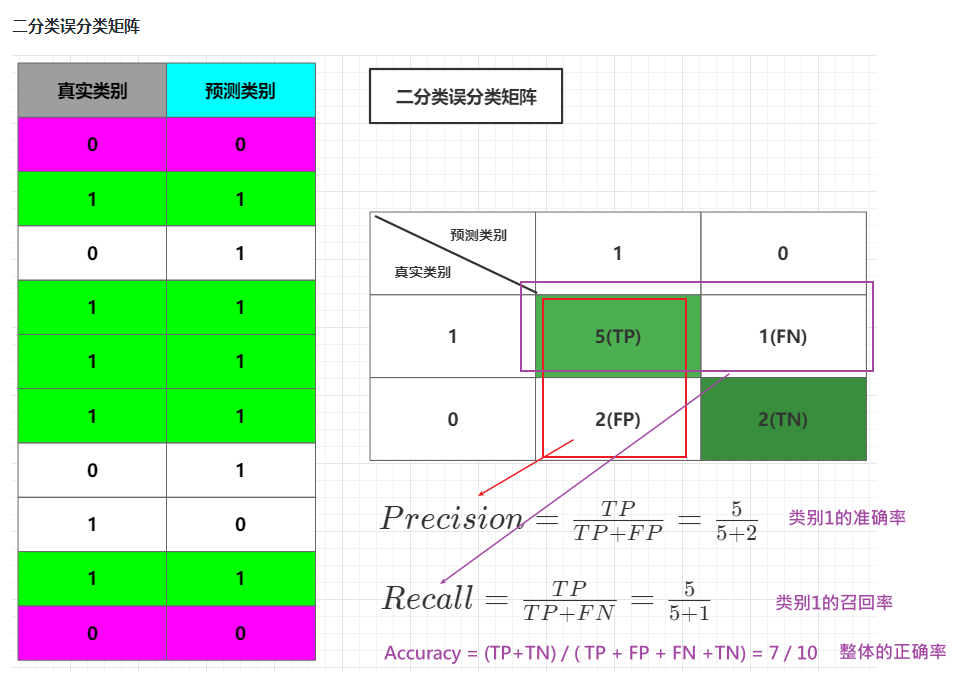

### 5.1 手动构建误分类矩阵

In [29]:
test_y
# 测试集中的目标变量：真实的y
# Series

480    0
885    0
440    1
335    0
525    0
      ..
109    1
114    0
118    0
456    0
767    0
Name: Survived, Length: 268, dtype: int64

In [30]:
y_test_pred
# 针对测试集的x预测出来的y
# Ndarray

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [31]:
len(y_test_pred)

268

In [32]:
# 构建一个由真实的y和预测出来的y组成的DataFrame
df_result = pd.DataFrame(
    {
        '实际值': test_y,
        '预测值': y_test_pred
    }
)

In [33]:
df_result

,实际值,预测值
480,0,0
885,0,0
440,1,1
335,0,0
525,0,0
...,...,...
109,1,1
114,0,1
118,0,0
456,0,0


In [34]:
# 构建误分类矩阵：实际值和预测值的交叉表
pd.crosstab(
    index = df_result.实际值,
    columns = df_result.预测值
)

预测值,0,1
实际值,,
0,134,32
1,30,72


In [35]:
cm = pd.crosstab(
    index = df_result.实际值,
    columns = df_result.预测值
)

## 5.2 利用误分类矩阵计算各种评估指标
### 5.2.1 正确率 
    
    所有预测正确的结果 / 全部数据
    是一个整体的结果

In [36]:
(134 + 72) / (134 + 32 + 30 + 72)

0.7686567164179104

TP : cm.iloc[1,1]   
TN : cm.iloc[0,0]  
FP : cm.iloc[0,1]  
FN : cm.iloc[1,0]  

In [37]:
(cm.iloc[0,0] + cm.iloc[1,1])/ cm.sum().sum()

0.7686567164179104

### 5.2.2 准确率：需要分类计算
    
    预测的某个类别中，真实数据的占比
    正例：预测为正的结果中，有多少真正的正例
    在交叉表（误分类矩阵）中做纵向计算（计算列百分比）

获救的准确率

In [38]:
72 / (72 + 32)

0.6923076923076923

In [39]:
cm.iloc[1,1] / (cm.iloc[0,1] + cm.iloc[1,1])

0.6923076923076923

遇难的准确率

In [40]:
cm.iloc[0,0] / (cm.iloc[0,0] + cm.iloc[1,0])

0.8170731707317073

In [41]:
pd.crosstab(
    index = df_result.实际值,
    columns = df_result.预测值,
    normalize = 'columns'
)

预测值,0,1
实际值,,
0,0.817073,0.307692
1,0.182927,0.692308


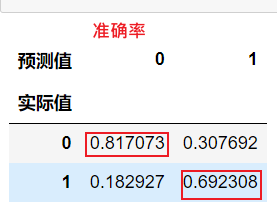

### 5.2.3 召回率：需要分类计算

    某个类别的真实数据中，被正确预测的比例
    正例：正确预测的正例 / 所有的正例
    在交叉表（误分类矩阵）中进行横向的计算（行百分比）

获救的召回率

In [42]:
cm.iloc[1,1] / (cm.iloc[1,0] + cm.iloc[1,1])

0.7058823529411765

In [43]:
pd.crosstab(
    index = df_result.实际值,
    columns = df_result.预测值,
    normalize = 'index'
)

预测值,0,1
实际值,,
0,0.807229,0.192771
1,0.294118,0.705882


## 5.3 通过sklearn获取各种评估指标

In [44]:
import sklearn.metrics
# 所有的评估指标

In [45]:
dir(sklearn.metrics)

['ConfusionMatrixDisplay',
 'DetCurveDisplay',
 'DistanceMetric',
 'PrecisionRecallDisplay',
 'PredictionErrorDisplay',
 'RocCurveDisplay',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_classification',
 '_dist_metrics',
 '_pairwise_distances_reduction',
 '_pairwise_fast',
 '_plot',
 '_ranking',
 '_regression',
 '_scorer',
 'accuracy_score',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'auc',
 'average_precision_score',
 'balanced_accuracy_score',
 'brier_score_loss',
 'calinski_harabasz_score',
 'check_scoring',
 'class_likelihood_ratios',
 'classification_report',
 'cluster',
 'cohen_kappa_score',
 'completeness_score',
 'confusion_matrix',
 'consensus_score',
 'coverage_error',
 'd2_absolute_error_score',
 'd2_pinball_score',
 'd2_tweedie_score',
 'davies_bouldin_score',
 'dcg_score',
 'det_curve',
 'euclidean_distances',
 'explained_variance_score',
 'f1_score',
 'fb

In [46]:
# 整体的正确率
sklearn.metrics.accuracy_score(test_y, y_test_pred)

0.7686567164179104

In [47]:
# 分类的准确率
sklearn.metrics.precision_score(test_y, y_test_pred)
# 正例的准确率
# 类别为1的准确率（获救）

0.6923076923076923

In [48]:
sklearn.metrics.precision_score(test_y, y_test_pred, pos_label=0)
# 负例（类别为0）的准确率

0.8170731707317073

In [49]:
# 召回率(正例)
sklearn.metrics.recall_score(test_y, y_test_pred)

0.7058823529411765

In [50]:
# 决策树算法
from sklearn import tree
tlf = tree.DecisionTreeClassifier()
tlf.fit(train_x, train_y)

DecisionTreeClassifier()

In [51]:
tree_pred_y = tlf.predict(test_x)
# 预测

In [52]:
tree_pred_y

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0], dtype=int64)

In [53]:
# 决策树算法的模型效果
print(classification_report(test_y , tree_pred_y))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       166
           1       0.71      0.66      0.68       102

    accuracy                           0.77       268
   macro avg       0.76      0.75      0.75       268
weighted avg       0.77      0.77      0.77       268



## 6、使用模型进行预测

模型训练完成，经过评估后如果模型性能已经达到业务性能指标要求。则接下来就可以使用训练好的模型对新的数据进行预测了，使用模型对新的数据进行预测流程如下

- 首先准备新的数据
- 加载新的数据集（data/new.csv）
- 对新的数据做类似于train.cvs同样的数据预处理流程
- 将处理好的新的数据集送入模型进行预测

In [54]:
test_df = pd.read_csv("data/new.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [55]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [56]:
# lr.predict(test_df)
# 直接拿新数据进行模型的预测会报错，因为其格式与构建模型所有的数据集结构完全不同

In [57]:
trainData_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   AgeIsMissing                  891 non-null    int64
 1   IsAlone                       891 non-null    int64
 2   IsMother                      891 non-null    int64
 3   Pclass_1                      891 non-null    int64
 4   Pclass_2                      891 non-null    int64
 5   Pclass_3                      891 non-null    int64
 6   Sex_female                    891 non-null    int64
 7   Sex_male                      891 non-null    int64
 8   Embarked_C                    891 non-null    int64
 9   Embarked_Q                    891 non-null    int64
 10  Embarked_S                    891 non-null    int64
 11  AgeBin_(0, 18]                891 non-null    int64
 12  AgeBin_(18, 25]               891 non-null    int64
 13  AgeBin_(25, 40]               891 n

模型评估过程中是对训练数据拆分出来的测试集进行预测，由于train_x 和test_x格式完全一样，所以操作起来非常简单。如果现在待预测的是一个全新的数据，就会稍微麻烦一点，因为我们通过一系列的数据预处理操作得到了X_train，现在需要对新数据集进行完全相同的预处理操作

编写一个数据预处理的函数，该函数需要既能处理训练数据集（train.csv）也能处理新的数据（test.csv），在开始编写该函数之前，需要明确训练数据集（train.csv）和新的数据（test.csv）之家的区别

- 训练集需要drop掉 PassengerId（乘客ID），而新数据集需要保留，因为预测结果需要与PassengerId关联在一起

- 训练集有 Survived 这个变量（目标变量），而新数据集没有这个变量

In [58]:
import pandas as pd
def prepare_data(path,role):
    """
    功能：实现对训练数据或者新的数据的数据预处理工作
    参数：
        @param path 读取的数据文件路径 
        @param role 数据文件的用途 ,两个取值：
                    train（表明预处理的是用来进行建模的数据集）
                    test （表明预处理的是用来进行预测的数据集）
    Return:
        返回预处理好后的训练集或测试集
    """
    titanic_df = pd.read_csv(path)
    # 根据数据集角色不一样，删除数据列也不一样
    if role == "train":
        titanic_df = titanic_df.drop(["PassengerId","Name","Ticket","Cabin"],axis=1)
    else:
        titanic_df = titanic_df.drop(["Name","Ticket","Cabin"],axis=1)
    titanic_df["AgeIsMissing"] = 0 
    titanic_df.loc[titanic_df["Age"].isnull(),"AgeIsMissing"] = 1
    age_mean = round(titanic_df.Age.mean())
    titanic_df.Age.fillna(age_mean,inplace=True)
    titanic_df.Embarked.fillna("S",inplace=True)
    cut_points = [0,18,25,40,60,100]
    titanic_df["AgeBin"] = pd.cut(titanic_df.Age,bins=cut_points)
    titanic_df["FareBin"] = pd.qcut(titanic_df.Fare,5)
    titanic_df["FamilySize"] = titanic_df["SibSp"] + titanic_df["Parch"] + 1
    titanic_df["IsAlone"] =0
    titanic_df.loc[titanic_df["FamilySize"] == 1,"IsAlone"] = 1
    titanic_df["IsMother"] = 0
    titanic_df.loc[(titanic_df["Sex"] == "female")&(titanic_df["Parch"] > 0)&(titanic_df["Age"]>20),
                   "IsMother"] = 1
    titanic_df["SexAgeCombo"] = titanic_df["Sex"] + "_" + titanic_df["AgeBin"].astype(str)
    Pclass_onehot = pd.get_dummies(titanic_df.Pclass,prefix="Pclass")
    Sex_onehot = pd.get_dummies(titanic_df.Sex,prefix="Sex") 
    Embarked_onehot = pd.get_dummies(titanic_df.Embarked,prefix="Embarked")
    AgeBin_onehot = pd.get_dummies(titanic_df.AgeBin,prefix="AgeBin")
    FareBin_onehot = pd.get_dummies(titanic_df.FareBin,prefix="FareBin")
    FamilySize_onehot = pd.get_dummies(titanic_df.FamilySize,prefix="FamilySize")
    SexAgeCombo_onehot = pd.get_dummies(titanic_df.SexAgeCombo,prefix="SexAgeCombo")
    # 数据集的角色不一样，拼接的数据列也不一样
    if role=="train":
        TrainData = pd.concat([titanic_df[["Survived","AgeIsMissing","IsAlone","IsMother"]],
                              Pclass_onehot,Sex_onehot,Embarked_onehot,AgeBin_onehot,
                              FareBin_onehot,FamilySize_onehot,SexAgeCombo_onehot],axis=1)
    else:
        TrainData = pd.concat([titanic_df[["PassengerId","AgeIsMissing","IsAlone","IsMother"]],
                              Pclass_onehot,Sex_onehot,Embarked_onehot,AgeBin_onehot,
                              FareBin_onehot,FamilySize_onehot,SexAgeCombo_onehot],axis=1)
    # 返回处理好的数据集
    return TrainData

使用预处理函数处理新的数据集（new.csv）

In [59]:
TestData = prepare_data("data/new.csv",role = "test") 
# 针对预测的数据集进行处理
# 去除掉PassengerId，剩余特征变量Test_X
Test_X = TestData.drop(['PassengerId'], axis = 1)
#  将预测用的数据集处理成和建模的数据集相同的结构

In [60]:
Test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   AgeIsMissing                  418 non-null    int64
 1   IsAlone                       418 non-null    int64
 2   IsMother                      418 non-null    int64
 3   Pclass_1                      418 non-null    bool 
 4   Pclass_2                      418 non-null    bool 
 5   Pclass_3                      418 non-null    bool 
 6   Sex_female                    418 non-null    bool 
 7   Sex_male                      418 non-null    bool 
 8   Embarked_C                    418 non-null    bool 
 9   Embarked_Q                    418 non-null    bool 
 10  Embarked_S                    418 non-null    bool 
 11  AgeBin_(0, 18]                418 non-null    bool 
 12  AgeBin_(18, 25]               418 non-null    bool 
 13  AgeBin_(25, 40]               418 n

In [61]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 81 to 65
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   AgeIsMissing                  623 non-null    int64
 1   IsAlone                       623 non-null    int64
 2   IsMother                      623 non-null    int64
 3   Pclass_1                      623 non-null    int64
 4   Pclass_2                      623 non-null    int64
 5   Pclass_3                      623 non-null    int64
 6   Sex_female                    623 non-null    int64
 7   Sex_male                      623 non-null    int64
 8   Embarked_C                    623 non-null    int64
 9   Embarked_Q                    623 non-null    int64
 10  Embarked_S                    623 non-null    int64
 11  AgeBin_(0, 18]                623 non-null    int64
 12  AgeBin_(18, 25]               623 non-null    int64
 13  AgeBin_(25, 40]               623 non-nu

In [62]:
Test_X

,AgeIsMissing,IsAlone,IsMother,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,"SexAgeCombo_female_(0, 18]","SexAgeCombo_female_(18, 25]","SexAgeCombo_female_(25, 40]","SexAgeCombo_female_(40, 60]","SexAgeCombo_female_(60, 100]","SexAgeCombo_male_(0, 18]","SexAgeCombo_male_(18, 25]","SexAgeCombo_male_(25, 40]","SexAgeCombo_male_(40, 60]","SexAgeCombo_male_(60, 100]"
0,0,1,0,False,False,True,False,True,False,True,...,False,False,False,False,False,False,False,True,False,False
1,0,0,0,False,False,True,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,1,0,False,True,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,True
3,0,1,0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,0,0,1,False,False,True,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,1,0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
414,0,1,0,True,False,False,True,False,True,False,...,False,False,True,False,False,False,False,False,False,False
415,0,1,0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
416,1,1,0,False,False,True,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [63]:
# 使用模型对新的数据进行预测
pred = lr.predict(Test_X.to_numpy())
# 把PassengerId和pred通过DataFrame()拼接起来形成最后的提交结果
Submission = pd.DataFrame({'PassengerId':TestData.PassengerId,'Survived':pred})
Submission
# 包含PassengedId的预测结果，是要提交的预测结果

d:\py11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


预测每一个类别的概率值，输出结果是二维数组

In [64]:
y_test_pred_prob = lr.predict_proba(Test_X.to_numpy())
# 值显示前10行
y_test_pred_prob[:10]
# 前一列是0发生的概率，后一列是1发生的概率

d:\py11\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.87494214, 0.12505786],
       [0.58820148, 0.41179852],
       [0.85105756, 0.14894244],
       [0.92275309, 0.07724691],
       [0.29492829, 0.70507171],
       [0.74239504, 0.25760496],
       [0.31637204, 0.68362796],
       [0.76185769, 0.23814231],
       [0.33281714, 0.66718286],
       [0.88733433, 0.11266567]])

In [65]:
pred[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

把类别预测结果和概率预测结果通过DataFrame()拼接起来

In [66]:
# 类别预测结果
pred_df = pd.DataFrame(pred,columns=['pred'])
# 概率预测结果
pred_prob_df = pd.DataFrame(y_test_pred_prob,columns=['p_0','p_1'])
result = pd.concat((pred_df,pred_prob_df),axis=1)
result.head()

,pred,p_0,p_1
0,0,0.874942,0.125058
1,0,0.588201,0.411799
2,0,0.851058,0.148942
3,0,0.922753,0.077247
4,1,0.294928,0.705072


In [67]:
Submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 7、逻辑回归模型理解

在本项目中，使用的使用的分类算法为逻辑回归（LogisticRegression）属于参数模型。它的模型输出结果就是一些参数值：特征变量的回归系数和截距

- coef_ : 特征变量的回归系数
- intercept_ : 截距

以上的logistic回归模型相当于是从泰坦尼克的乘客数据特征$x_{1},x_{2},...,x_{40}$到乘客是否生还的目标变量$y$之间的映射函数$f(x)$  
该函数可以描述为：
$$
y = f(x_{1},x_{2},...,x_{40})
$$
即回归方程
$$
logitP = \beta_0x_0 + \beta_1x_1 + \beta_2x_2 + ... \beta_nx_n + e
$$
从$\beta_{0},\beta_{1},...,\beta_{40}$称为回归系数，表示的是每个特征对目标结果的影响大小  
$e$称为截距（当所有的特征都为0时，y对应的值）

In [68]:
lr.intercept_
# 截距

array([-0.33609306])

In [69]:
lr.coef_
# 每个自变量对应的回归系数

array([[ 2.86435243e-02,  3.46257107e-01, -6.06318670e-01,
         9.76596875e-01, -1.72994945e-01, -8.03687382e-01,
         1.24145747e+00, -1.24154292e+00,  1.73784964e-01,
         1.80551603e-01, -3.54422019e-01,  4.92340699e-01,
        -9.07084150e-05,  4.11263154e-02, -2.78816162e-01,
        -2.54645596e-01, -5.82250720e-01, -1.82499743e-01,
         1.90267363e-01,  1.80987079e-01,  3.93410569e-01,
         3.46257107e-01,  3.68320005e-01,  1.01579844e+00,
         8.14691319e-01, -9.10919706e-01, -7.56481221e-01,
         6.36719071e-01, -7.83190199e-01, -7.31280268e-01,
        -1.82595245e-01,  5.24655824e-01,  3.36876566e-01,
         3.88956523e-01,  1.73563803e-01,  6.74935944e-01,
        -5.24746532e-01, -2.95750250e-01, -6.67772684e-01,
        -4.28209399e-01]])

In [70]:
len(lr.coef_[0])

40

In [71]:
lr.coef_.shape

(1, 40)

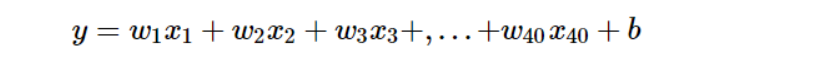
利用回归系数和截距拼出回归方程

In [72]:
s = "y = "
for index,coef in enumerate(lr.coef_.flatten().tolist()):
    print(index,coef)
    # 每个回归系数的索引和索引对应的回归系数值
    # 该索引也对应每个特征的索引（x1,x2,....x40）
    if coef < 0:
        s += "{:.2}*x{}".format(coef,index+1)
    else:
        s += "+{:.2}*x{}".format(coef,index+1)
print(s)

0 0.0286435242588468
1 0.3462571073578525
2 -0.6063186702541009
3 0.9765968749259062
4 -0.17299494492255177
5 -0.8036873819273782
6 1.2414574702940935
7 -1.241542922218114
8 0.1737849644350875
9 0.18055160273079876
10 -0.35442201908990706
11 0.49234069865660346
12 -9.070841496661264e-05
13 0.04112631539716864
14 -0.27881616157354694
15 -0.2546455959892806
16 -0.5822507200308049
17 -0.18249974263889351
18 0.19026736320173762
19 0.18098707874756148
20 0.39341056879637964
21 0.3462571073578525
22 0.3683200048519086
23 1.015798438979628
24 0.8146913186578512
25 -0.910919705532655
26 -0.7564812208174411
27 0.6367190712145393
28 -0.7831901990981732
29 -0.7312802675375295
30 -0.18259524530847338
31 0.5246558240788728
32 0.3368765658333633
33 0.3889565227364361
34 0.1735638029538952
35 0.6749359439650761
36 -0.5247465324938376
37 -0.29575025043619546
38 -0.6677726843099833
39 -0.42820939894317533
y = +0.029*x1+0.35*x2-0.61*x3+0.98*x4-0.17*x5-0.8*x6+1.2*x7-1.2*x8+0.17*x9+0.18*x10-0.35*x11+0.49*

将回归系数与相应特征组合成DataFrame

In [73]:
# 把变量名称和系数对应起来组合成dataframe
coef = pd.DataFrame(list(zip(train_x.columns, np.transpose(lr.coef_))), columns=['columns', 'coef'])
# 按照coef的值从高到底排序
# 目的是为了了解哪个特征对获救与否的影响更大
coef = coef.sort_values(by =['coef'], ascending=False)
coef

,columns,coef
6,Sex_female,[1.2414574702940935]
23,FamilySize_3,[1.015798438979628]
3,Pclass_1,[0.9765968749259062]
24,FamilySize_4,[0.8146913186578512]
35,"SexAgeCombo_male_(0, 18]",[0.6749359439650761]
27,FamilySize_7,[0.6367190712145393]
31,"SexAgeCombo_female_(18, 25]",[0.5246558240788728]
11,"AgeBin_(0, 18]",[0.49234069865660346]
20,"FareBin_(39.688, 512.329]",[0.39341056879637964]
33,"SexAgeCombo_female_(40, 60]",[0.3889565227364361]


In [74]:
# 在coef中添加一个由回归系数的绝对值构成的列
coef['coef_abs'] = np.abs(coef.coef)
coef

,columns,coef,coef_abs
6,Sex_female,[1.2414574702940935],[1.2414574702940935]
23,FamilySize_3,[1.015798438979628],[1.015798438979628]
3,Pclass_1,[0.9765968749259062],[0.9765968749259062]
24,FamilySize_4,[0.8146913186578512],[0.8146913186578512]
35,"SexAgeCombo_male_(0, 18]",[0.6749359439650761],[0.6749359439650761]
27,FamilySize_7,[0.6367190712145393],[0.6367190712145393]
31,"SexAgeCombo_female_(18, 25]",[0.5246558240788728],[0.5246558240788728]
11,"AgeBin_(0, 18]",[0.49234069865660346],[0.49234069865660346]
20,"FareBin_(39.688, 512.329]",[0.39341056879637964],[0.39341056879637964]
33,"SexAgeCombo_female_(40, 60]",[0.3889565227364361],[0.3889565227364361]


In [75]:
#  按绝对值大小进行降序排列
coef1 = coef.sort_values(by = ['coef_abs'], ascending = False)
coef1

,columns,coef,coef_abs
7,Sex_male,[-1.241542922218114],[1.241542922218114]
6,Sex_female,[1.2414574702940935],[1.2414574702940935]
23,FamilySize_3,[1.015798438979628],[1.015798438979628]
3,Pclass_1,[0.9765968749259062],[0.9765968749259062]
25,FamilySize_5,[-0.910919705532655],[0.910919705532655]
24,FamilySize_4,[0.8146913186578512],[0.8146913186578512]
5,Pclass_3,[-0.8036873819273782],[0.8036873819273782]
28,FamilySize_8,[-0.7831901990981732],[0.7831901990981732]
26,FamilySize_6,[-0.7564812208174411],[0.7564812208174411]
29,FamilySize_11,[-0.7312802675375295],[0.7312802675375295]


In [76]:
# 构建用来进行绘图的列
coef1['coef_x'] = coef1.coef.apply(lambda x: x[0])
coef1

,columns,coef,coef_abs,coef_x
7,Sex_male,[-1.241542922218114],[1.241542922218114],-1.241543
6,Sex_female,[1.2414574702940935],[1.2414574702940935],1.241457
23,FamilySize_3,[1.015798438979628],[1.015798438979628],1.015798
3,Pclass_1,[0.9765968749259062],[0.9765968749259062],0.976597
25,FamilySize_5,[-0.910919705532655],[0.910919705532655],-0.910920
24,FamilySize_4,[0.8146913186578512],[0.8146913186578512],0.814691
5,Pclass_3,[-0.8036873819273782],[0.8036873819273782],-0.803687
28,FamilySize_8,[-0.7831901990981732],[0.7831901990981732],-0.783190
26,FamilySize_6,[-0.7564812208174411],[0.7564812208174411],-0.756481
29,FamilySize_11,[-0.7312802675375295],[0.7312802675375295],-0.731280


In [77]:
coef1.index = coef1['columns']
# 将columns列作为DataFrame的索引
coef1.head()

,columns,coef,coef_abs,coef_x
columns,,,,
Sex_male,Sex_male,[-1.241542922218114],[1.241542922218114],-1.241543
Sex_female,Sex_female,[1.2414574702940935],[1.2414574702940935],1.241457
FamilySize_3,FamilySize_3,[1.015798438979628],[1.015798438979628],1.015798
Pclass_1,Pclass_1,[0.9765968749259062],[0.9765968749259062],0.976597
FamilySize_5,FamilySize_5,[-0.910919705532655],[0.910919705532655],-0.910920


<Axes: ylabel='columns'>

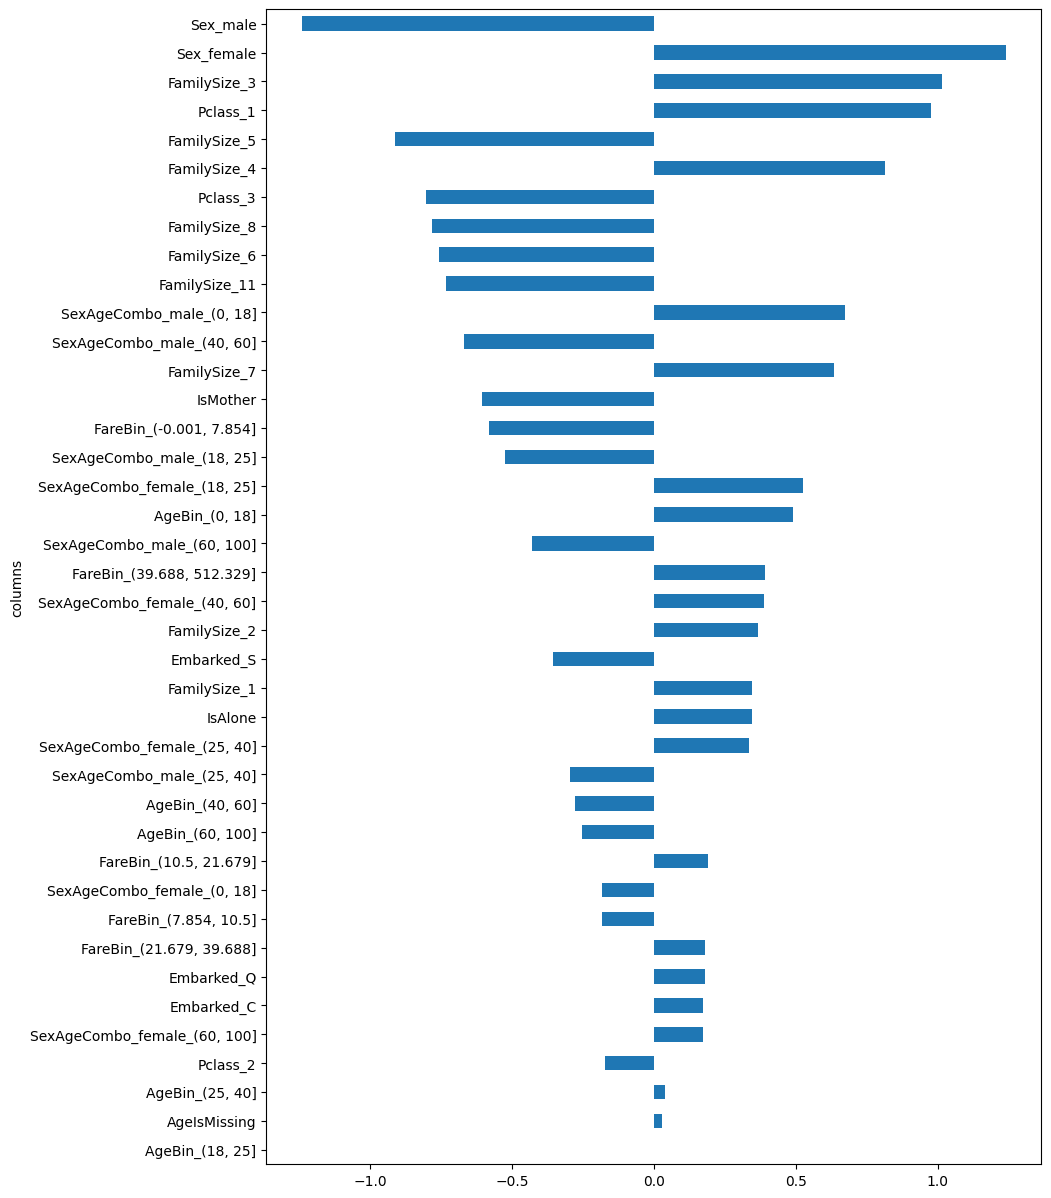

In [78]:
# 绘图
coef1.coef_x[::-1].plot(   # 数据升序图降序
    kind = 'barh',
    figsize = (10,15)
)

系数解读：由于每一个类别型的变量都转换为0/1的独热编码（相当于标准化了），所以回归系数的大小可以反映特征变量对模型的重要性，可以利用这个结果来进行特征变量的筛选。系数为正表示与分类模型的正例（类别=1)是正相关，即这些特征的乘客生还概率大；反之系数为负就表示生还概率小。我们看到，对模型预测最重要的特征变量是 ：

- Sex_female：女性
- FamilySize_3：家庭成员数=3
- Pclass_1：一等舱
- FamilySize_4：家庭成员数=4
- SexAgeCombomale(0, 18]：男性&年龄18岁以下

影响较大的原始特征：Sex, Pclass, Sibsp/Parch, Age

# 任务二：模型保存与加载
【任务目标】
掌握如何使用pickle模块进行模型加载与保存
掌握如何使用sklearn.joblib进行模型加载与保存

## 1、为什么需要保存模型

由于sklearn训练好的模型是存储在内存中，如果内存清除了，下次就需要再重新训练。如果训练数据较大，模型较复杂的话，一般训练模型的时间会比较长，所以我们会将训练的模型进行保存（持久化），然后需要用的时候再读取出来进行评估和预测，这样可以节省大量的时间。有两种模型持久化的方法：

- 使用python的pickle模块
- 使用sklearn内部的joblib

## 2、pickle模块

pickle模块可以对任何对象进行序列化并保存到磁盘中，并在需要的时候读取出来，所以这是一种通用的做法。 使用pickle.dump()方法保存模型

In [79]:
lr
# 训练好的模型

LogisticRegression()

In [80]:
#记得先要导入pickle模块：
import pickle
# 确认一下lr是我们训练好的逻辑回归模型 :
# sklearn.linear_model.logistic.LogisticRegression
type(lr)
# 通过pickle.dump()把lr模型保存为lrmodel.pickle文件
with open('lrmodel.pickle', 'wb') as fw:
    pickle.dump(lr, fw)

使用pickle.load()方法加载模型

In [81]:
# 通过pickle.load 加载 lrmodel.pickle文件，把读取出来的模型赋予一个新的对象 new_lr
with open('lrmodel.pickle', 'rb') as fr:
    new_lr = pickle.load(fr)
#通过type()查看new_lr，的确是一个LogisticRegression模型
type(new_lr)
# sklearn.linear_model.logistic.LogisticRegression
#让我们用new_lr.predict()来对X_test预测一下
new_lr.predict(test_x)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [82]:
new_lr

LogisticRegression()

In [83]:
new_lr.coef_

array([[ 2.86435243e-02,  3.46257107e-01, -6.06318670e-01,
         9.76596875e-01, -1.72994945e-01, -8.03687382e-01,
         1.24145747e+00, -1.24154292e+00,  1.73784964e-01,
         1.80551603e-01, -3.54422019e-01,  4.92340699e-01,
        -9.07084150e-05,  4.11263154e-02, -2.78816162e-01,
        -2.54645596e-01, -5.82250720e-01, -1.82499743e-01,
         1.90267363e-01,  1.80987079e-01,  3.93410569e-01,
         3.46257107e-01,  3.68320005e-01,  1.01579844e+00,
         8.14691319e-01, -9.10919706e-01, -7.56481221e-01,
         6.36719071e-01, -7.83190199e-01, -7.31280268e-01,
        -1.82595245e-01,  5.24655824e-01,  3.36876566e-01,
         3.88956523e-01,  1.73563803e-01,  6.74935944e-01,
        -5.24746532e-01, -2.95750250e-01, -6.67772684e-01,
        -4.28209399e-01]])

## 3、sklearn.joblib模块
操作比pickle更加简洁

In [84]:
# 使用 sklearn 的 joblib
# 保存和读取的流程和pickle基本一样的套路，就不赘述了，记得导包
import joblib
# 保存模型为文件
joblib.dump(lr, "lrmodel.m")
# 读取模型文件
new_lr2 = joblib.load("lrmodel.m")
# 预测
new_lr2.predict(test_x)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1], dtype=int64)

In [ ]:
# 使用到的数据集
# train_processed.csv
# new.csv